In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Definimos las columnas que nos interesan
fields = ['country', 'points','price', 'variety']
vinos = pd.read_csv('wine_reviews.csv', usecols=fields)
vinos.head()

,country,points,price,variety
0,Italy,87,NaN,White Blend
1,Portugal,87,15.0,Portuguese Red
2,US,87,14.0,Pinot Gris
3,US,87,13.0,Riesling
4,US,87,65.0,Pinot Noir


In [5]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   country  129908 non-null  object 
 1   points   129971 non-null  int64  
 2   price    120975 non-null  float64
 3   variety  129970 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 4.0+ MB


In [7]:
vinos.dropna(inplace=True)

[Text(0.5, 0, 'Precio (USD)'),
 Text(0, 0.5, 'Puntuacion del vino'),
 Text(0.5, 1.0, 'Precio vs Puntaje en vinos')]

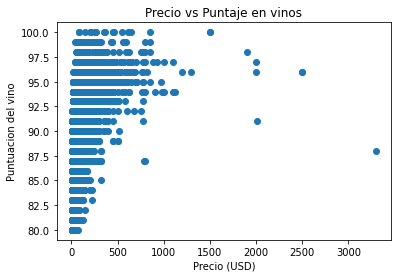

In [16]:
# Tomamos las coordenadas
x = vinos.price.values
y = vinos.points.values

fig = plt.figure()
ax = plt.axes()

ax.scatter(x,y)
ax.set(xlabel = 'Precio (USD)', ylabel='Puntuacion del vino', title='Precio vs Puntaje en vinos')

[Text(0.5, 0, 'Precio (USD)'),
 Text(0, 0.5, 'Puntuacion del vino'),
 Text(0.5, 1.0, 'Precio vs Puntaje en vinos'),
 (0.0, 500.0)]

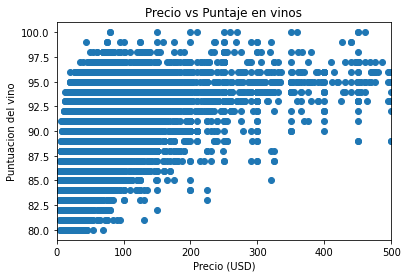

In [19]:
# Como no pueden observarse de una buena manera reducire precio de los vinos a 500
fig = plt.figure()
ax = plt.axes()
ax.scatter(x,y)
ax.set(xlabel = 'Precio (USD)', ylabel='Puntuacion del vino', title='Precio vs Puntaje en vinos', xlim=(0,500))

[Text(0.5, 0, 'Precio (USD)'),
 Text(0, 0.5, 'Puntuacion del vino'),
 Text(0.5, 1.0, 'Precio vs Puntaje en vinos'),
 (0.0, 300.0)]

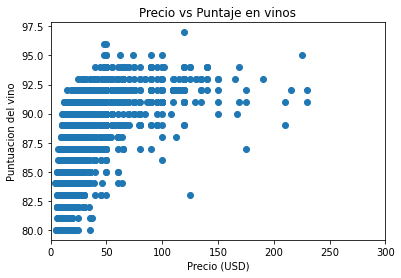

In [29]:
#Se crea un filtro para conocer las puntuaciones en Argentina
argentina = vinos['country'] == 'Argentina'

x = vinos.loc[argentina, ['price']].values
y = vinos.loc[argentina, ['points']].values
fig = plt.figure()
ax = plt.axes()
ax.scatter(x,y)
ax.set(xlabel = 'Precio (USD)', ylabel='Puntuacion del vino', title='Precio vs Puntaje en vinos', xlim=(0,300))

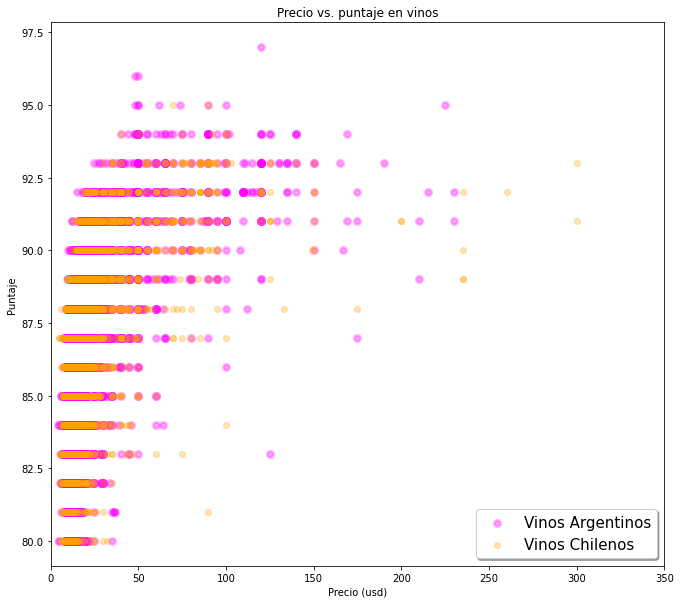

In [64]:
#Se crea un filtro para Chile y compararlo con Argentina
chile = vinos['country'] == 'Chile'

precio_arg = vinos.loc[argentina, ['price']].values
puntos_arg = vinos.loc[argentina, ['points']].values

precio_chi = vinos.loc[chile, ['price']].values
puntos_chi = vinos.loc[chile, ['points']].values
plt.rcParams["figure.figsize"] = (11, 10)
fig = plt.figure()
ax = plt.axes()


# Graficamos puntos semi transparentes, cada uno con el label adecuado
ax.scatter(precio_arg, puntos_arg, label = 'Vinos Argentinos',alpha = 0.3, color='magenta', linewidths=3)
ax.scatter(precio_chi, puntos_chi, label = 'Vinos Chilenos',alpha = 0.3, color='orange')

ax.set(xlabel='Precio (usd)', ylabel='Puntaje',
       title='Precio vs. puntaje en vinos', xlim = (0,350))

# Agregamos la leyenda al gráfico, la graficamos abajo a la derecha
ax.legend(loc='lower right', shadow=True, fontsize=15)


In [ ]:
# Podemos observar que el vino mas barato y mejor puntuado le pertenece a Argentina
# Los vinos mas caros son los chilenos siendo de 95 puntos la mejor puntuiacion para uno de estos